## Structure similarity and clustering

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, squareform
import itertools
from itertools import starmap
%matplotlib inline

## hide warning messages 
import warnings
warnings.filterwarnings('ignore')

## First of all, get the adj matrix 

In [3]:
## load sample network 
G = nx.karate_club_graph()
node_list = G.nodes()
node_list.sort()
A = nx.to_numpy_matrix(G = G,nodelist=node_list)

## Distance measures 

- Jaccard similarity:  $J(A,B) = {{|A \cap B|}\over{|A \cup B|}} = {{|A \cap B|}\over{|A| + |B| - |A \cap B|}}$ -- usua
- Cosine similarity (vector in n-dim space): $$a \cdot b =\left\|\mathbf {a} \right\|\left\|\mathbf {b} \right\|\cos \theta$$
$$ {\text{similarity}}=\cos(\theta )={\mathbf {A} \cdot \mathbf {B}  \over \|\mathbf {A} \|\|\mathbf {B} \|}={\frac {\sum \limits _{i=1}^{n}{A_{i}B_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{A_{i}^{2}}}}{\sqrt {\sum \limits _{i=1}^{n}{B_{i}^{2}}}}}} , where A_{i} and B_{i} are components of vector A and B respectively.$$
- Pearson correlation coefficient: $r(\alpha,\beta)=\frac{\sum_i (j^\alpha_i-\bar{j^\alpha})(k^\beta_i-\bar{k^\beta})}{ \sqrt{\sum_i (j^\alpha_i-\bar{j^\alpha})^2} \sqrt{\sum_i (k^\beta_i-\bar{k^\beta})^2} }.$ -- it is basically the normal corrolation coefficient 

- #### User scipy pdist() function to get distance mearues. pdist() always return distance measure rather then similarity measure

In [4]:
## import some distance measueing matrix 
## bais distance calculateion, for adj matrix 
M = pdist(A, 'cosine')                 # it will return a vector, this is using cosine distance
M = squareform(M)                      # convert the vector to a diaganal matrix 

### 1. cliques, k-cliques, k-core
- cliques, all nodes in the community are connect with each other, -- not very useful, too strick
- k-core: a relexization of clique, each in the community that is connect to least k nodes in the community

In [5]:
## k-cliques
G = nx.karate_club_graph()
cliqComm = nx.k_clique_communities(G, 4)       ## we use k = 4 here, usually we use 2, to refer friend of a friend
cliqComm=list(cliqComm)                        ## this is an overlapping community 
print("sets: ",cliqComm)

colorList=np.ones([G.order(),])
for c in range(len(cliqComm)):
    for i in cliqComm[c]:
        colorList[i] += c+1
print('colors: ', colorList )  


sets:  [frozenset({0, 1, 2, 3, 7, 13}), frozenset({32, 33, 29, 23}), frozenset({32, 33, 8, 30})]
colors:  [ 2.  2.  2.  2.  1.  1.  1.  2.  4.  1.  1.  1.  1.  2.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  3.  1.  1.  1.  1.  1.  3.  4.  1.  6.  6.]


[0, 1, 2, 3, 33, 32, 8, 7, 13, 30]
color:  [ 2.  2.  2.  2.  1.  1.  1.  2.  2.  1.  1.  1.  1.  2.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  2.]


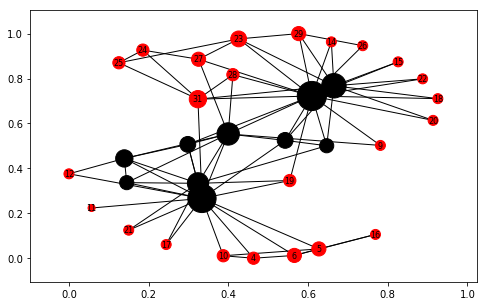

In [6]:
## k-core
k=4
cores = nx.k_core(G,k).nodes()   ## k_core, returns a subgraph 
print(cores)
colorList=np.ones([G.order(),])
for i in cores:
    colorList[i] += 1
print('color: ', colorList)

## draw the graph 
k = nx.degree(G)
layout = nx.spring_layout(G)
plt.figure(1, figsize=(8,5))
nx.draw_networkx(G,
                 pos=layout,
                 nodelist=k.keys(),
                 node_size = [d*50 for d in list(k.values())],  ## change the size of the node, based on degree
                 node_color=colorList,                   ## change color abased on degree
                 font_size=8,
                 cmap='flag',                                 ## choose one color map http://matplotlib.org/users/colormaps.html
                 )

### 2. hierarchy clustering

In [7]:
Z = hierarchy.average(M)
## the returnd matrix, row 1, tell you waht clusters get merged at step 1, [idx1, idx2, dist, sample_count]

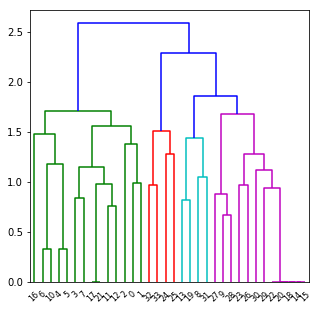

In [8]:
## show dendrogram 
plt.figure(figsize=(5,5))
D = hierarchy.dendrogram(Z)
## for dendrogram truncated version see: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

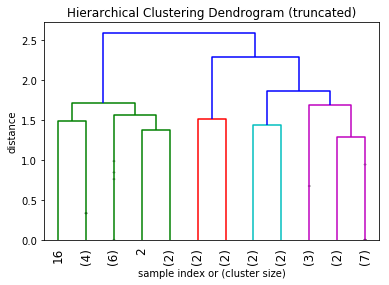

In [9]:
## truncted version if dendrogram 
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
hierarchy.dendrogram(
    Z,
    truncate_mode='lastp',   # show only the last p merged clusters
    p=12,                    # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,    # to get a distribution impression in truncated branches
)
plt.show()

##### 2.1 Selecting a Distance Cut-Off aka Determining the Number of Clusters

In [10]:
## retrieve clusters
from scipy.cluster.hierarchy import fcluster

In [11]:
# set cut-off to 2
max_d = 2  # max_d as in max_distance
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2], dtype=int32)

In [12]:
# or you know k, the number of clusters
k=2
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

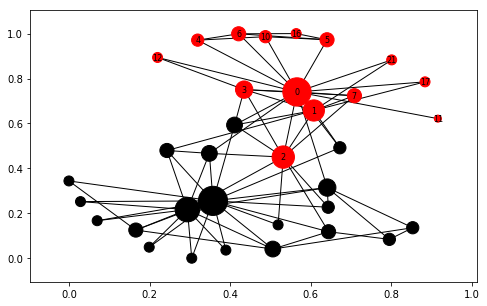

In [13]:
k = nx.degree(G)
layout = nx.spring_layout(G)
plt.figure(1, figsize=(8,5))
nx.draw_networkx(G,
                 pos=layout,
                 nodelist=k.keys(),
                 node_size = [d*50 for d in list(k.values())],  ## change the size of the node, based on degree
                 node_color=list(clusters),                   ## change color abased on degree
                 font_size=8,
                 cmap='flag',                                 ## choose one color map http://matplotlib.org/users/colormaps.html
                 )

### 3. Communities 
- Network communities are groups of vertices such that vertices inside the group connected with many more edges than between groups 

### 4. Ovelaping communities 
There are a lot of ways to do overlapping communitye, for instance you can use fuzzy clustering with vertix similarity. 
Here we will use k-clique community method 
- k-clique community

In [14]:
## k-cliques
G = nx.karate_club_graph()
cliqComm = nx.k_clique_communities(G, 3)       ## we use k = 4 here
cliqComm=list(cliqComm)                        ## this is an overlapping community 
print("sets: ",cliqComm)

colorList=np.ones([G.order(),])
for c in range(len(cliqComm)):
    for i in cliqComm[c]:
        colorList[i] += c+1
print('colors: ', colorList )  


sets:  [frozenset({0, 1, 2, 3, 7, 8, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({24, 25, 31}), frozenset({0, 16, 4, 5, 6, 10})]
colors:  [ 5.  2.  2.  2.  4.  4.  4.  2.  2.  1.  4.  1.  2.  2.  2.  2.  4.  2.
  2.  2.  2.  2.  2.  2.  3.  3.  2.  2.  2.  2.  2.  4.  2.  2.]
